In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as req
from citipy import citipy
from datetime import datetime
from config import weather_api_key
from scipy.stats import linregress

In [2]:
def build_url(city):
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    return base_url + "units=Imperial" + "&APPID=" + weather_api_key + "&q=" + city

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?" + "units=Imperial" + "&APPID=" + weather_api_key

In [4]:
cities = ["Pittsburgh", "Austin", "New  York", "Los Angeles", "Seattle"]
for city in cities:
    try:
        city_url = url + "&q=" + city
        weather = req.get(city_url).json()
        temp = weather['main']['temp']
    except KeyError:
        print("KeyError received for " + city)
        continue
    print("It is currently " + str(temp) + " degrees in " + city)

        

It is currently 75.36 degrees in Pittsburgh
It is currently 77.22 degrees in Austin
KeyError received for New  York
It is currently 67.98 degrees in Los Angeles
It is currently 44.51 degrees in Seattle


# Create zipped lat_lngs[] with 1500 random lat & lon values

In [5]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# create coordinates[] from zipped lat_lngs[]

In [6]:
coordinates = list(lat_lngs)

# Use citipy to find nearest_city for coordinates[] and append to cities[]

In [7]:
cities = []
for coordinate in coordinates:
    x = coordinate[0]
    y = coordinate[1]
    city_name    = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    country_code = citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    #print(f"{x} {y} {city_name} {country_code}")
    if city_name not in cities:
        cities.append(city_name)
print(len(cities))

604


# Append rows to city_data[] for each city

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        #print("city="+city
        #      +", lat="+str(city_weather['coord']['lat'])
        #      +", lon="+str(city_weather['coord']['lon']))  

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | visnes
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | barsovo
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | wanning
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | muros
Processing Record 12 of Set 1 | walvis bay
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | jiddah
City not found. Skipping...
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | santa rosa
Processing Record 20 of Set 1 | najran
Processing Record 21 of Set 1 | salalah
Processing Record 22 of Set 

Processing Record 41 of Set 4 | aqtobe
Processing Record 42 of Set 4 | guekedou
City not found. Skipping...
Processing Record 43 of Set 4 | hovd
Processing Record 44 of Set 4 | marcona
City not found. Skipping...
Processing Record 45 of Set 4 | northam
Processing Record 46 of Set 4 | kikwit
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | gurgan
City not found. Skipping...
Processing Record 1 of Set 5 | kologriv
Processing Record 2 of Set 5 | derzhavinsk
Processing Record 3 of Set 5 | hami
Processing Record 4 of Set 5 | necaxa
Processing Record 5 of Set 5 | bose
Processing Record 6 of Set 5 | dicabisagan
Processing Record 7 of Set 5 | coquimbo
Processing Record 8 of Set 5 | bubaque
Processing Record 9 of Set 5 | mehamn
Processing Record 10 of Set 5 | roma
Processing Record 11 of Set 5 | arraial do cabo
Processing Record 12 of Set 5 | nizhneyansk
City not found. Skipping...


Processing Record 31 of Set 8 | takoradi
Processing Record 32 of Set 8 | pitlochry
Processing Record 33 of Set 8 | jahanabad
Processing Record 34 of Set 8 | zabaykalsk
Processing Record 35 of Set 8 | tianpeng
Processing Record 36 of Set 8 | sao joao da barra
Processing Record 37 of Set 8 | poya
Processing Record 38 of Set 8 | maragogi
Processing Record 39 of Set 8 | samusu
City not found. Skipping...
Processing Record 40 of Set 8 | sao francisco
Processing Record 41 of Set 8 | narsaq
Processing Record 42 of Set 8 | isla vista
Processing Record 43 of Set 8 | buala
Processing Record 44 of Set 8 | jieznas
Processing Record 45 of Set 8 | soskovo
Processing Record 46 of Set 8 | utena
Processing Record 47 of Set 8 | kinsale
Processing Record 48 of Set 8 | pevek
Processing Record 49 of Set 8 | san ramon
Processing Record 50 of Set 8 | krasnyy sulin
Processing Record 1 of Set 9 | bull savanna
Processing Record 2 of Set 9 | aguililla
Processing Record 3 of Set 9 | vao
Processing Record 4 of Set

Processing Record 21 of Set 12 | afanasyevo
City not found. Skipping...
Processing Record 22 of Set 12 | palmer
Processing Record 23 of Set 12 | flekkefjord
Processing Record 24 of Set 12 | cervia
Processing Record 25 of Set 12 | dabat
Processing Record 26 of Set 12 | pacific grove
Processing Record 27 of Set 12 | sault sainte marie
Processing Record 28 of Set 12 | aflu
City not found. Skipping...
Processing Record 29 of Set 12 | hearst
Processing Record 30 of Set 12 | nikolayevsk-na-amure
Processing Record 31 of Set 12 | russell
Processing Record 32 of Set 12 | halifax
Processing Record 33 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 34 of Set 12 | paradwip
City not found. Skipping...
Processing Record 35 of Set 12 | teya
Processing Record 36 of Set 12 | ridgecrest
Processing Record 37 of Set 12 | neiafu
Processing Record 38 of Set 12 | nishihara
Processing Record 39 of Set 12 | moose factory
Processing Record 40 of Set 12 | bharatpur
Processing Record 41 of Set 

# Create city_data_df DataFrame

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Visnes,59.3556,5.2242,37.00,80,75,28.77,NO,2021-04-07 17:30:48
1,Whitehorse,60.7161,-135.0538,10.99,51,20,5.75,CA,2021-04-07 17:30:48
2,Barsovo,61.1667,73.1667,32.00,93,75,6.71,RU,2021-04-07 17:30:48
3,Yellowknife,62.4560,-114.3525,18.00,67,90,13.80,CA,2021-04-07 17:30:05
4,Albany,42.6001,-73.9662,66.99,35,39,1.99,US,2021-04-07 17:30:42
5,Fortuna,40.5982,-124.1573,50.00,87,90,8.05,US,2021-04-07 17:30:49
6,Wanning,18.8003,110.3967,73.45,90,20,0.38,CN,2021-04-07 17:30:49
7,Dikson,73.5069,80.5464,-0.54,89,52,3.76,RU,2021-04-07 17:30:50
8,Saint-Philippe,-21.3585,55.7679,78.80,83,20,4.61,RE,2021-04-07 17:30:50
9,Avarua,-21.2078,-159.7750,80.60,74,90,6.91,CK,2021-04-07 17:30:50


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Visnes,NO,2021-04-07 17:30:48,59.3556,5.2242,37.00,80,75,28.77
1,Whitehorse,CA,2021-04-07 17:30:48,60.7161,-135.0538,10.99,51,20,5.75
2,Barsovo,RU,2021-04-07 17:30:48,61.1667,73.1667,32.00,93,75,6.71
3,Yellowknife,CA,2021-04-07 17:30:05,62.4560,-114.3525,18.00,67,90,13.80
4,Albany,US,2021-04-07 17:30:42,42.6001,-73.9662,66.99,35,39,1.99


# Output cities.csv

In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Get parameters for scatter plots from city_data_df

In [12]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Latitude vs. Max Temp scatter plot

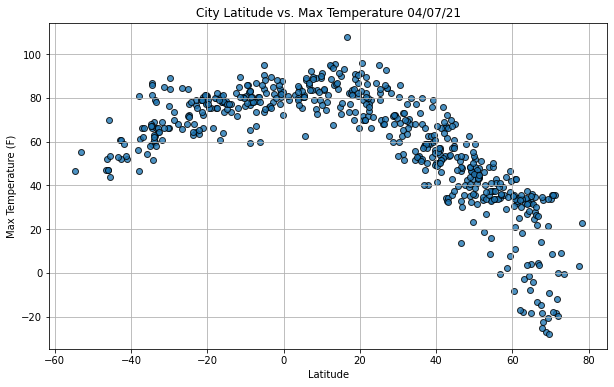

In [116]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# Latitude vs. Humidity scatter plot

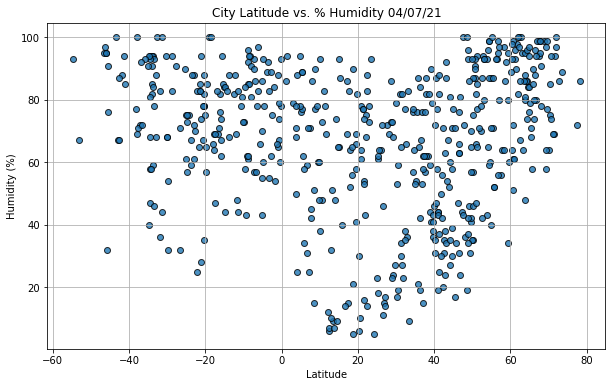

In [115]:
# Build the scatter plots for latitude vs. humidity.
plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. % Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Latitude vs. Cloudiness scatter plot

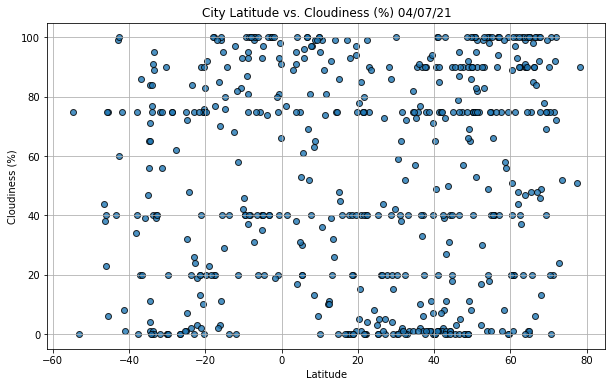

In [114]:
# Build the scatter plots for latitude vs. cloudiness.
plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Latitude vs. Wind Speed scatter plot

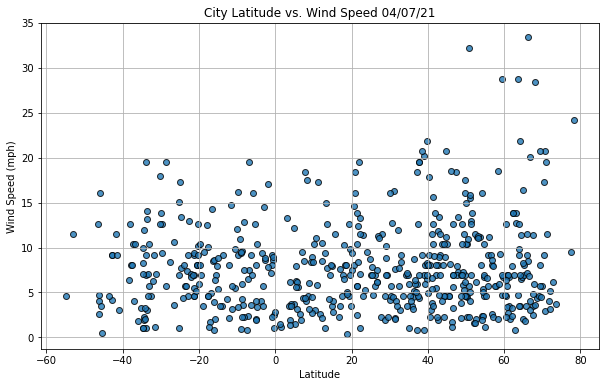

In [113]:
# Build the scatter plots for latitude vs. wind speed.
plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [109]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, figpath=None):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print("slope=" + str(slope))
    print("intercept=" + str(intercept))
    print("r_value=" + str(r_value))
    print("p_value=" + str(p_value))
    print("std_err=" + str(std_err))
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + " r=" + str(round(r_value,2)) + " p=" + str(round(p_value,2)) + " stderr=" + str(round(std_err,2))
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.subplots(figsize=(10, 6))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.savefig(figpath)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                    Esperance
Country                        AU
Date          2021-04-07 17:30:52
Lat                      -33.8667
Lng                         121.9
Max Temp                     62.6
Humidity                       94
Cloudiness                     40
Wind Speed                   6.91
Name: 13, dtype: object

# Create northern_hemi_df and souther_hemi_df

In [24]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear regression on Northern Max Temp

slope=-1.2343050825524602
intercept=101.88184940041202
r_value=-0.8697287283654516
p_value=6.667088428881399e-119
std_err=0.035883090511018664


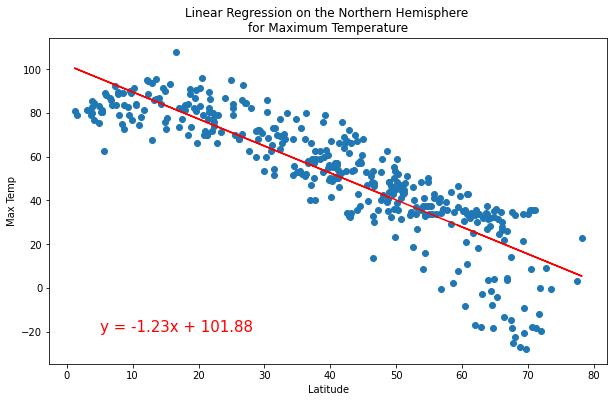

In [120]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',
                       (5,-20),
                       "weather_data/temp_vs_lat_north.png")

# Linear regression on Southern Max Temp

slope=0.5690981929967893
intercept=84.97209106740051
r_value=0.7076026466789669
p_value=4.854752948061629e-28
std_err=0.043082734650935824


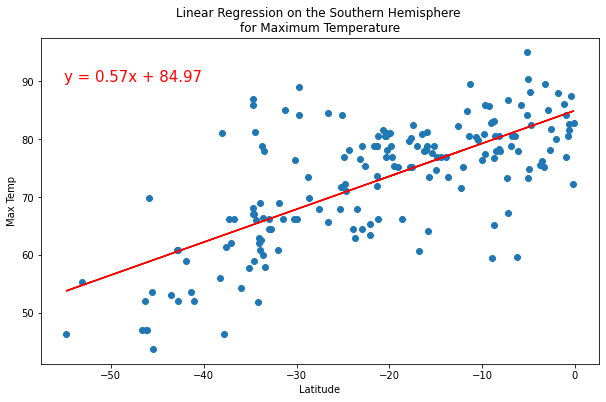

In [121]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',
                       (-55,90),
                       "weather_data/temp_vs_lat_south.png")

# Linear regression on Northern Humidity

slope=0.4873358823430707
intercept=44.25646523321563
r_value=0.37347981952251036
p_value=4.0129604211541815e-14
std_err=0.0620122422493554


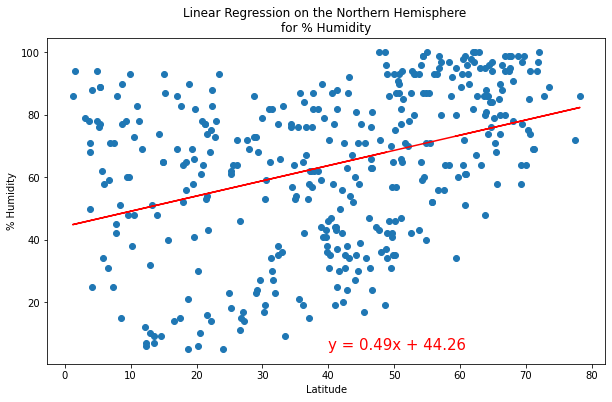

In [123]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity',
                       '% Humidity',
                       (40,5),
                       "weather_data/hum_vs_lat_north.png")

# Linear regression on Southern Humidity

slope=-0.11438699275410893
intercept=72.64987665074851
r_value=-0.09009768943290844
p_value=0.23436725335855027
std_err=0.0958558137184972


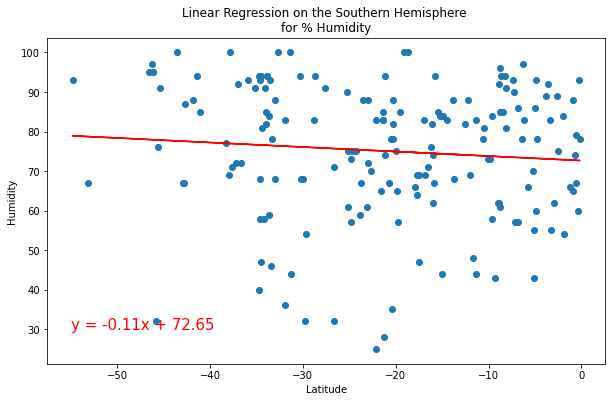

In [124]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity',
                       'Humidity',
                       (-55, 30),
                      "weather_data/hum_vs_lat_south.png")

# Linear regression on Northern Cloudiness

slope=0.27414860699832355
intercept=41.47332826181693
r_value=0.14356185632715854
p_value=0.004878132687254999
std_err=0.09681938541729257


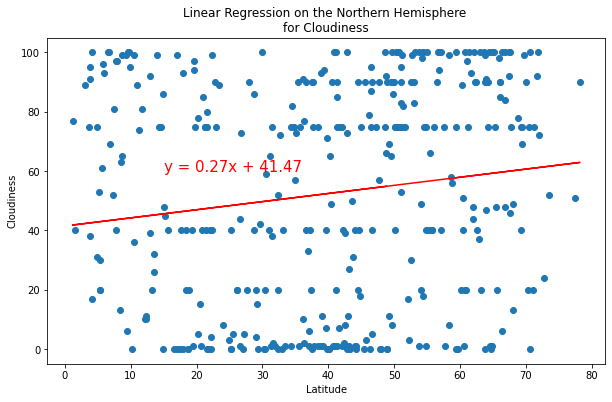

In [125]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Cloudiness',
                       'Cloudiness',
                       (15,60),
                      "weather_data/clouds_vs_lat_north.png")

# Linear regression on Southern Cloudiness

slope=0.7228546412183932
intercept=68.16673337076847
r_value=0.2769079123693509
p_value=0.00019887609667235283
std_err=0.19015930346339108


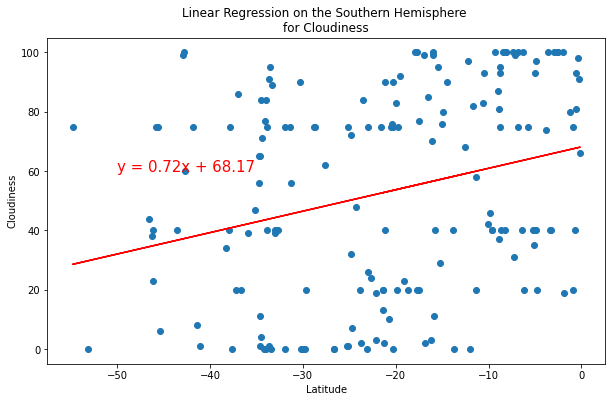

In [126]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Cloudiness',
                       'Cloudiness',
                       (-50,60),
                      "weather_data/clouds_vs_lat_south.png")

# Linear regression on Northern Wind Speed

slope=0.03685194432991443
intercept=6.434297250584809
r_value=0.13410009060748834
p_value=0.008596659927928805
std_err=0.01395174040706906


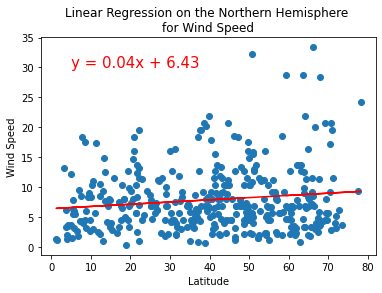

<Figure size 432x288 with 0 Axes>

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed',
                       'Wind Speed',
                       (5, 30))
plt.savefig("weather_data/wind_vs_lat_north.png")

# Linear regression on Southern Wind Speed

slope=-0.008704201106960557
intercept=7.179822143463273
r_value=-0.027020232322819325
p_value=0.7218595623326236
std_err=0.02441218307073436


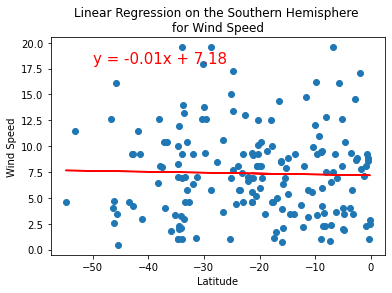

<Figure size 432x288 with 0 Axes>

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed',
                       'Wind Speed',
                       (-50,18))
plt.savefig("weather_data/wind_vs_lat_south.png")